In [122]:
import numpy as np
import json
import pandas as pd
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import sys
import collections
sys.path.insert(0,"../")
sys.path.insert(0,"../../")

import dl_utils.save_io as savio

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [123]:
n_samples = 100
x_values = [-1,1]
#y_values = [i/2 for i in range(10)]
y_values = [i for i in range(5)]
std = 0.1
cov = 0.2

varbs = []
for x in x_values:
    for y in y_values:
        varbs.append([x,y])
varbs = np.asarray(varbs)

samples = []
xmean = 0
ymean = 0
for _ in range(n_samples):
    samp = varbs.copy()
    #samp[:,1] += 0.5*np.random.randn(len(samp))
    noise = std*np.random.randn(*samp.shape)
    samp = samp + noise
    samp[:,0] += cov*samp[:,1]
    samples.append(samp)
samples = np.vstack(samples)
print(samples.shape)

(1000, 2)


/home/grantsrb/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/grantsrb/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/grantsrb/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/grantsrb/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

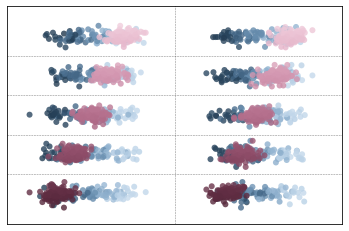

In [129]:
df = pd.DataFrame({
    "x": samples[:,0],
    "y": samples[:,1],
    "hue": samples[:,1],
})
df["x"] = (df["x"]-np.mean(df["x"]))
df["hue"] = df["hue"]-np.min(df["hue"])
df["hue"] = df["hue"]/np.max(df["hue"])



fontsize=25
legendsize = 25
alpha = 0.8
dark = 0.2
light = 0.85
rot = 0
thickness = 0.5
fig = plt.figure()
ax = plt.gca()

intrv_df = df.copy()
intrv_df["y"] = np.asarray(intrv_df["y"])[np.random.permutation(len(intrv_df)).astype(int)]
intrv_cmap = sns.cubehelix_palette(start=-.3, rot=rot, dark=dark, light=light, reverse=True, as_cmap=True)
#intrv_cmap = sns.dark_palette("blue", as_cmap=True)
sns.scatterplot(x="x", y="y", alpha=alpha, data=intrv_df, ax=ax, hue="hue", palette=intrv_cmap, edgecolor="none")

native_cmap = sns.cubehelix_palette(start=0.7, rot=rot, dark=dark, light=light, reverse=True, as_cmap=True)
#native_cmap = sns.dark_palette("red", as_cmap=True)
sns.scatterplot(x="x", y="y", alpha=alpha, data=df, ax=ax, hue="hue", palette=native_cmap, edgecolor="none")
                #hue="hue", palette="blue")
    
## y divider

ax.plot([0,0],[-1,5], "k--", alpha=0.5, linewidth=thickness)
# x dividers
for i in y_values[:-1]:
    y = i+0.5
    ax.plot([-2,2],[y,y], "k--", alpha=0.5, linewidth=thickness)
plt.xlim([-2,2])
plt.ylim([-0.75,4.75])

plt.xlabel("", fontsize=fontsize)
plt.ylabel("", fontsize=fontsize)

plt.xticks([], fontsize=fontsize)
plt.yticks([], fontsize=fontsize)

# # Manually create colorbars / legend patches
# native_cmap = sns.cubehelix_palette(start=0.7, rot=rot, dark=dark, light=light, reverse=True, as_cmap=True)
# intrv_cmap = sns.cubehelix_palette(start=-.3, rot=rot, dark=dark, light=light, reverse=True, as_cmap=True)

# Legend handles: colored rectangles with labels
native_patch = mpatches.Patch(color=native_cmap(0.8), label="Native")
intrv_patch = mpatches.Patch(color=intrv_cmap(0.8), label="Intervened")

#ax.legend(handles=[native_patch, intrv_patch], fontsize=legendsize, loc="upper right", bbox_to_anchor=(1.75,1))
plt.legend().set_visible(False)
plt.savefig("figs/example_divergence.png", dpi=600, bbox_inches="tight")

plt.show()

/home/grantsrb/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/grantsrb/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/grantsrb/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/grantsrb/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

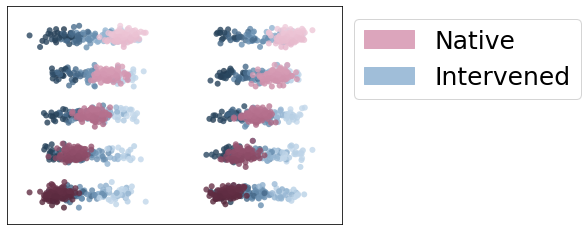

In [126]:
import matplotlib.patches as mpatches
import matplotlib as mpl

df = pd.DataFrame({
    "x": samples[:,0],
    "y": samples[:,1],
    "hue": samples[:,1],
})
df["x"] = (df["x"]-np.mean(df["x"]))
df["hue"] = df["hue"]-np.min(df["hue"])
df["hue"] = df["hue"]/np.max(df["hue"])



fontsize=25
legendsize = 25
alpha = 0.8
dark = 0.2
light = 0.85
rot = 0
fig = plt.figure()
ax = plt.gca()

intrv_df = df.copy()
intrv_df["y"] = np.asarray(intrv_df["y"])[np.random.permutation(len(intrv_df)).astype(int)]
intrv_cmap = sns.cubehelix_palette(start=-.3, rot=rot, dark=dark, light=light, reverse=True, as_cmap=True)
#intrv_cmap = sns.dark_palette("blue", as_cmap=True)
sns.scatterplot(x="x", y="y", alpha=alpha, data=intrv_df, ax=ax, hue="hue", palette=intrv_cmap, edgecolor="none")

native_cmap = sns.cubehelix_palette(start=0.7, rot=rot, dark=dark, light=light, reverse=True, as_cmap=True)
#native_cmap = sns.dark_palette("red", as_cmap=True)
sns.scatterplot(x="x", y="y", alpha=alpha, data=df, ax=ax, hue="hue", palette=native_cmap, edgecolor="none")
                #hue="hue", palette="blue")
    
## y divider
#ax.plot([0,0],[-1,5], "k--", alpha=0.5)
## x dividers
#for i in y_values[:-1]:
#    y = i+0.5
#    ax.plot([-2,2],[y,y], "k--", alpha=0.5)
plt.xlim([-2,2])
plt.ylim([-0.75,4.75])

plt.xlabel("", fontsize=fontsize)
plt.ylabel("", fontsize=fontsize)

plt.xticks([], fontsize=fontsize)
plt.yticks([], fontsize=fontsize)

# # Manually create colorbars / legend patches
# native_cmap = sns.cubehelix_palette(start=0.7, rot=rot, dark=dark, light=light, reverse=True, as_cmap=True)
# intrv_cmap = sns.cubehelix_palette(start=-.3, rot=rot, dark=dark, light=light, reverse=True, as_cmap=True)

# Legend handles: colored rectangles with labels
native_patch = mpatches.Patch(color=native_cmap(0.8), label="Native")
intrv_patch = mpatches.Patch(color=intrv_cmap(0.8), label="Intervened")

ax.legend(handles=[native_patch, intrv_patch], fontsize=legendsize, loc="upper right", bbox_to_anchor=(1.75,1))
plt.savefig("figs/legend.png", dpi=600, bbox_inches="tight")

plt.show()